In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gas =pd.read_csv('gas_prices.csv')
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


***Line Graph***

0     1990
3     1993
6     1996
9     1999
12    2002
15    2005
18    2008
Name: Year, dtype: int64


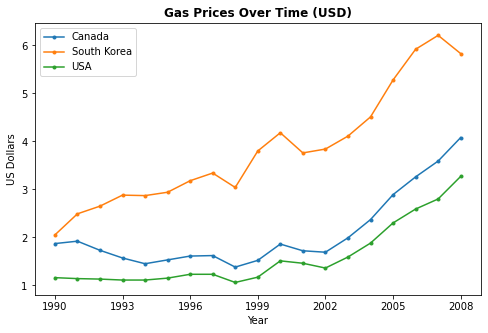

In [3]:
plt.figure(figsize=(8,5))

plt.title('Gas Prices Over Time (USD)', fontdict={'fontweight':'bold'})

#plt.plot(gas.Year , gas.USA, 'b.-')
#plt.plot(gas.Year , gas.Canada, 'r.-')
#plt.plot(gas.Year , gas['South Korea'], 'g.-')

country_list=['USA', 'Canada', 'South Korea']

for country in gas:
    if country in country_list:
        plt.plot(gas.Year, gas[country], marker='.' , label=country)
        
print(gas.Year[::3])

plt.xticks(gas.Year[::3])
#plt.xticks(gas.Year[::3].tolist()+[2011])



plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()

plt.savefig('Gas_prices.png')
plt.show()  


### Fifa Data

In [30]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Histogram

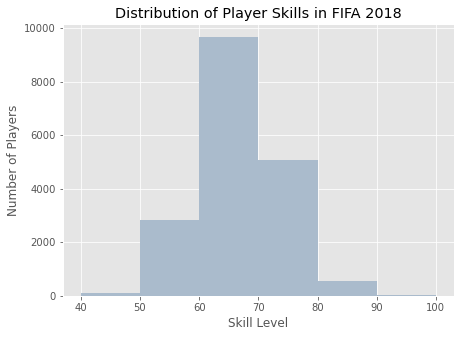

In [31]:
bins = [40,50,60,70,80,90,100]

plt.figure(figsize=(7,5))

plt.hist(fifa.Overall, bins=bins, color='#abc')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

plt.savefig('histogram.png', dpi=100)

plt.show()

Pie Chart

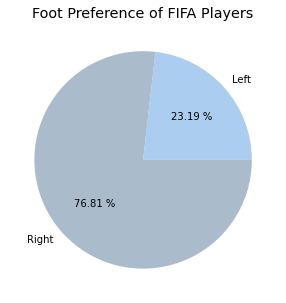

In [32]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]   #.loc returns an array and  element 0  has the count
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')  #%.2f two decimals 

plt.title('Foot Preference of FIFA Players')

plt.show()

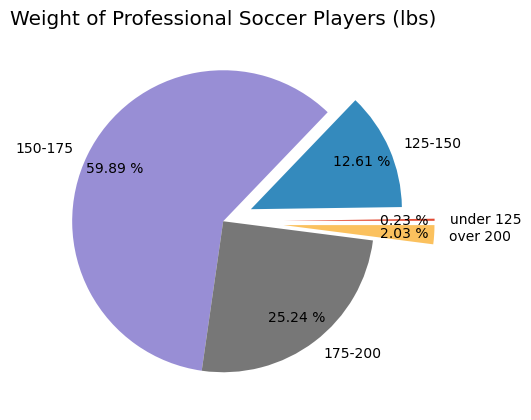

In [33]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')




fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

In [34]:
fifa.Weight=[x.strip('lbs')if type(x)==str else x for x in fifa.Weight]

        
fifa.Weight

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64